<a href="https://colab.research.google.com/github/KBerry-050/data-science-portfolio/blob/main/Module_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from IPython import display
import pickle
import datetime
import os
from IPython.display import Image

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.backend import clear_session
from keras.callbacks import History 
from keras_adabound import AdaBound

Using TensorFlow backend.


In [ ]:
# import libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# DATA INGESTION

In [ ]:
# INGEST TRAIN AND TEST DATASETS
train = pd.read_csv('train.csv')
train = pd.DataFrame(train)

test = pd.read_csv('test.csv')
test = pd.DataFrame(test)

In [ ]:
# peproces the data
x = train.drop(['label'], axis = 1)
y = train['label']

# Reshape (height = 28px, width = 28px , canal = 1) + Normalize Data
x = x.values.reshape(-1, 28, 28, 1)/255
holdout = test.values.reshape(-1, 28, 28, 1)/255

# Encode labels to one hot vectors
y = to_categorical(y, num_classes = 10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y)

# MODELING

In [ ]:
# create function to build neural network
def build_nn(num_layers, num_nodes, dropout_rate, num_classes, model_name='model'):
  # build out hidden layers based on num_layers and num_nodes arguments.
  dense_layers = [Dense(num_nodes, activation='relu') for _ in range(num_layers)]
  # combine all layers including input layer, hidden layers, dropout layer, and output layer
  layers = [Flatten(input_shape=[28, 28, 1])] + dense_layers + [Dropout(dropout_rate)] +  [Dense(num_classes, activation='softmax')]

  model = Sequential(layers, name=model_name)

  return model

In [ ]:
# create functions to plot loss and accuracy metrics
def plot_loss(loss, val_loss):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show();


def plot_acc(acc, val_acc):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show();

In [ ]:
import pydot
import graphviz

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________



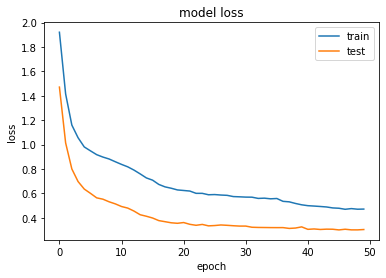

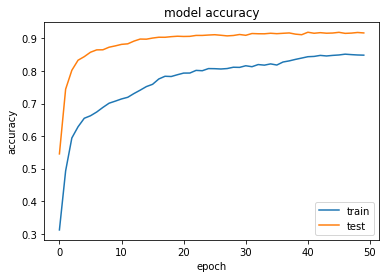

------------------------------------------------------------------------------------------------------------------
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________



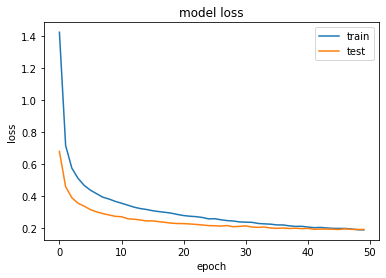

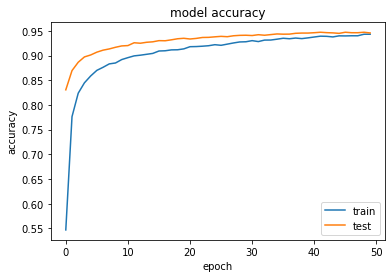

------------------------------------------------------------------------------------------------------------------
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
__________

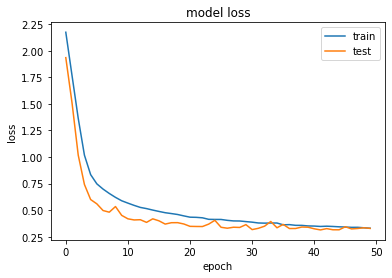

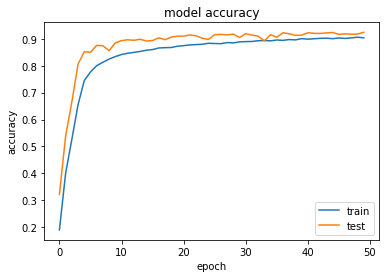

------------------------------------------------------------------------------------------------------------------
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
__________

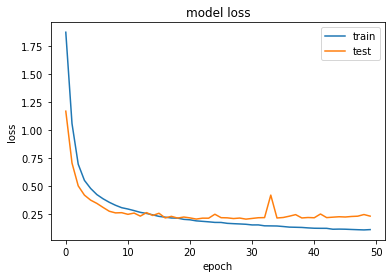

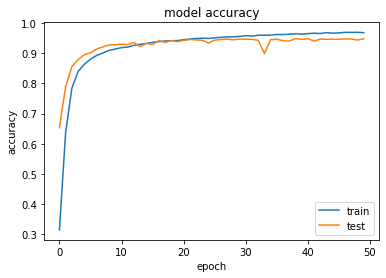

------------------------------------------------------------------------------------------------------------------
CPU times: user 12min 34s, sys: 21min 53s, total: 34min 28s
Wall time: 7min 6s


In [ ]:
%%time
num_layers = [2, 5]
num_nodes = [10, 20]
results = []
count = 1

for l in num_layers:
  for n in num_nodes:
    clear_session()

    model = build_nn(num_layers=l, num_nodes=n, dropout_rate=0.2, num_classes=10, model_name=f'model_{count}')
    model.compile(loss="categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["acc"])
    
    start = datetime.datetime.now()

    history = History()
    model.fit(x_train, 
              y_train, 
              epochs=50, 
              validation_split=0.25,
              callbacks=[history],
              verbose=0)
    
    end = datetime.datetime.now()

    model.summary()
    print('')

    # Plot loss over time.
    plot_loss(history.history['loss'], history.history['val_loss'])

    # Plot accuracy over time.
    plot_acc(history.history['acc'], history.history['val_acc'])

    # train_score = model.evaluate(x_train, y_train, verbose=0)
    # test_score = model.evaluate(x_test, y_test, verbose=0)

    results.append({'layers': l, 'nodes': n, 'fit_time': (end-start).total_seconds(), 
                    'train_accuracy': history.history['acc'][-1], 'test_accuracy': history.history['val_acc'][-1]})
    
    plot_model(model, to_file=f'model_{count}.png', show_shapes=True, show_layer_names=True)

    count+=1
    print('------------------------------------------------------------------------------------------------------------------')

In [ ]:
# evaluate the results
df_results = pd.DataFrame(results)
df_results

,layers,nodes,fit_time,train_accuracy,test_accuracy
0,2,10,87.928806,0.848730,0.917024
1,2,20,102.053553,0.943333,0.945952
2,5,10,111.550016,0.903690,0.924405
3,5,20,120.961338,0.967540,0.947381


In [ ]:
%%time
clear_session()
model = build_nn(num_layers=2, num_nodes=20, dropout_rate=0.2, num_classes=10)
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["acc"])

history = History()
model.fit(x_train, 
          y_train, 
          epochs=250, # increasing epochs 
          validation_split=0.25,
          callbacks=[history],
          verbose=0)

CPU times: user 14min 5s, sys: 27min 32s, total: 41min 37s
Wall time: 8min 10s


In [ ]:
# evaluate model against test split
score = model.evaluate(x_test, y_test, verbose=0)
labels = model.metrics_names

print(str(labels[0]) + ": " + str(score[0]))
print(str(labels[1]) + ": " + str(score[1]))

loss: 0.25801900194004357
acc: 0.9479761719703674


In [ ]:
y_test_preds = model.predict(x_test)
y_test_preds_class = np.argmax(y_test_preds, axis=1)
y_test_ = np.argmax(y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test_, y_test_preds_class)
cm_df = pd.DataFrame(cm, columns = ["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6", "Predicted 7", "Predicted 8", "Predicted 9"], 
                     index = ["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6", "Actual 7", "Actual 8", "Actual 9"])
cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,805,0,4,1,3,0,4,1,7,2
Actual 1,0,912,10,4,1,0,0,4,5,1
Actual 2,7,6,780,6,10,0,5,13,6,2
Actual 3,2,1,21,805,0,17,1,6,9,8
Actual 4,1,0,4,0,766,0,7,5,3,28
Actual 5,2,1,3,19,0,714,4,1,9,6
Actual 6,10,1,4,0,6,7,797,0,2,0
Actual 7,2,3,7,3,8,1,1,834,6,15
Actual 8,3,5,6,8,3,8,2,0,766,12
Actual 9,6,2,0,5,15,9,0,10,7,784


In [ ]:
# Kaggle Predictions
nn_preds = model.predict(holdout)
nn_preds_class = np.argmax(nn_preds, axis=1)

nn_preds = pd.Series(nn_preds_class, name='Label')
kaggle_submission = pd.concat([pd.Series(range(len(holdout)), name='ImageId'), nn_preds], axis=1)
kaggle_submission['ImageId'] += 1
kaggle_submission.to_csv(r'/Users/kyleberry/Documents/MSDS-422/Module 7/New/digit_recognizer_nn.csv', index=False)

# CONCLUSION

Evaluating the results clearly indicates that the model performs better with 20 nodes than it does with 10 nodes. This is the case for both 2 layers and 5 layers. The fitting time is significantly less for 2 layers and with the limiting compute power that I have access to, it is more feasible to do iterative testing with less layers. Increasing the number of epochs from 50 to 250 did not improve the accuracy of the model, either. The most performant version of my model was with 2 layers, 20 nodes and 50 epochs. 